# P2: Investigate a Dataset

## Introduction

My choice of data to analyse is **Titanic**. Why? Because I am a big fan of this movie and would like to know more about this event in history.

Let's load some data here, take a look at it and think about questions on which we would like to receive answers using this data.

### Data introduction

##### VARIABLE DESCRIPTIONS:

**survival**        Survival (0 = No; 1 = Yes)
                
**pclass**          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
                
**name**            Name

**sex**             Sex

**age**             Age

**sibsp**           Number of Siblings/Spouses Aboard

**parch**           Number of Parents/Children Aboard

**ticket**          Ticket Number

**fare**            Passenger Fare

**cabin**           Cabin

**embarked**        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

##### SPECIAL NOTES:
*Pclass* is a proxy for socio-economic status (SES)

 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

*Age* is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

*Sibling*:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

*Spouse*:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

*Parent*:   Mother or Father of Passenger Aboard Titanic

*Child*:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [56]:
# importing all necessary packages
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# importing the data
titanic_original = pd.read_csv('titanic-data.csv')

# make a copy of original file with which we will be working
titanic_copy = titanic_original.copy()
# show first rows in the data file
titanic_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Questions for further analysis

As we see in the table above, there are many factors that may or may not save a human life on this ship.

Let's analyse this data and answer on the following questions:

1. Which age (age range) was the most likely to survive?

2. What was the survival rate of the passengers based on the Pclass?

3. Which gender had a better chance of survival?

4. Did a fare have any impact in the survival rates?

## Data Cleaning

1.Let's cut some columns that we won't use in our further analysis process. We will remove Name, SibSp, Parch, Ticket, Cabin and Embarked columns:

In [57]:
# drop unneccessary columns 
titanic_copy.drop(["Name", "SibSp","Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
# show first rows from modified file
titanic_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


2.Now let's check if we have any bad\missing data in our table copy. I will use *count* function to check if every column has the same number of rows or not.

In [58]:
# count rows for every column
titanic_copy.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
dtype: int64

Well, we have missing data in Age column. It's better to change missing values by average age of all passengers on the ship but I don't plan to use any strong calculations which can't work with missing data, so for now I leave them like this.

And last action that I would like to make is to change 0 and 1 values for Survived column to *Survived* and *Died*, respectively, and 1, 2, 3 values for Pclass to *First Class*, *Second Class*, *Third Class*, respectively:

In [59]:
# change values for Survived column by maping 0 to 'no' and 1 ,to 'yes'
titanic_copy['Survival'] = titanic_copy.Survived.map({0 : 'Died', 1 : 'Survived'})
# change values for Pclass column by maping 1 to 'First Class', 2 to 'Second Class' and 3 ,to 'Third Class'
titanic_copy['Class'] = titanic_copy.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
# show first rows of the table for column Survival
titanic_copy.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [60]:
# show first rows of the table for column Class
titanic_copy.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

## Data Exploring

In [61]:
titanic_copy.describe()

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,NaN,7.910400
50%,446.000000,0.000000,3.000000,NaN,14.454200
75%,668.500000,1.000000,3.000000,NaN,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


Before we try to find answers on our questions I am interested to know % of people who survived and % who not.

In [62]:
# number of survived and not survived passengers
number_of_survived_and_not = titanic_copy.groupby('Survival').count()['PassengerId']
number_of_survived_and_not

Survival
Died        549
Survived    342
Name: PassengerId, dtype: int64

In [63]:
# percent of survived and not survived passengers
percentage_of_survived_and_not = number_of_survived_and_not.divide(number_of_survived_and_not.sum(axis=0))*100
percentage_of_survived_and_not

Survival
Died        61.616162
Survived    38.383838
Name: PassengerId, dtype: float64

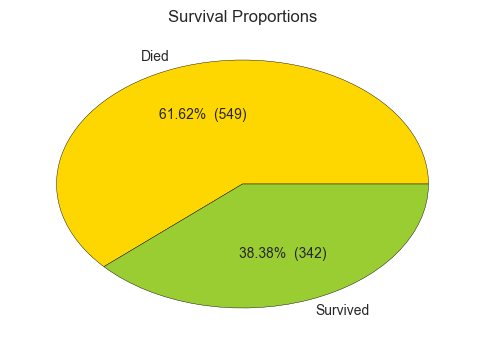

In [64]:
# create plot as a pie to compare percentage of those who survived and those who did not
# The following function is used to create counts and percentages in the pie
def make_autopct(values):
  def my_autopct(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct
titanic_survived = titanic_copy.groupby('Survival').size()
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
plt.pie(titanic_survived, colors=colors, labels = ['Died', 'Survived'], autopct = make_autopct(df))
plt.title('Survival Proportions')

As we see on the plot above, more than 60% of the passengers didn't survive.

Now let's try to find correlation between factors and number of survived passengers.

### 1. Which age (age range) was the most likely to survive?

In [67]:
# find min, max and mean of age for those passengers who survived
titanic_copy[titanic_copy.Survival=='Survived']['Age'].describe()

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

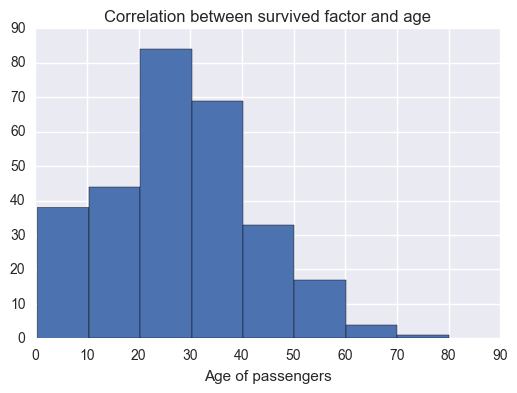

In [68]:
# histogram of age distribution for those passengers who survived
(titanic_copy[titanic_copy.Survival=='Survived']['Age'].dropna().hist(bins=8)).set(xlabel='Age of passengers')
plt.title('Correlation between survived factor and age')

From this histogram we can conclude that if passenger was 20-30 years old then he\she had more chances to survive.

### 2. What was the survival rate of the passengers based on the Pclass?

In [69]:
# number of passengers who survived and not split by Pclass
number_of_survived_by_pclass = titanic_copy.groupby(['Survival', 'Class']).size().unstack('Survival')
# percentage of passengers who survived and not split by Pclass
rates_of_survived_by_pclass = number_of_survived_by_pclass.divide(number_of_survived_by_pclass.sum(axis=1),axis=0)*100
rates_of_survived_by_pclass

Survival,Died,Survived
Class,,
First Class,37.037037,62.962963
Second Class,52.717391,47.282609
Third Class,75.763747,24.236253


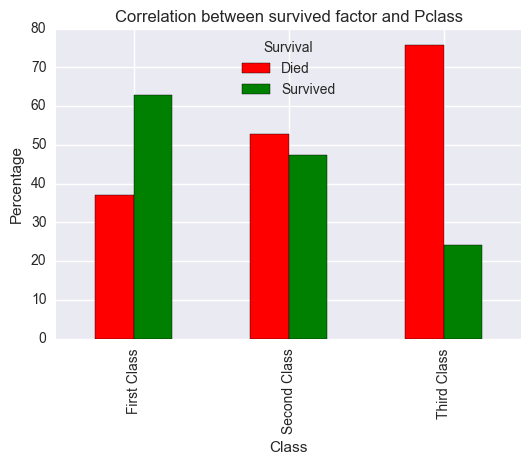

In [70]:
# using barplot to compare rates of survived and not depending on the Pclass
rates_of_survived_by_pclass.plot(kind='bar', color=['red','green'], title='Correlation between survived factor and Pclass').set(ylabel="Percentage")

We see that the most part of passengers who were in the 3rd class died. Practically equal number who survived and who not from the 2nd class. And most who survived in the 1st class.

### 3. Which gender had a better chance of survival?

In [71]:
# number of survived and not survived passengers split by sex
number_of_survived_by_gender = titanic_copy.groupby(['Survival', 'Sex']).count()['PassengerId']
# percent of survived and not survived passengers split by sex
percentage_of_survived_by_gender= number_of_survived_by_gender.divide(number_of_survived_by_gender.sum(axis=0))*100
percentage_of_survived_by_gender

Survival  Sex   
Died      female     9.090909
          male      52.525253
Survived  female    26.150393
          male      12.233446
Name: PassengerId, dtype: float64

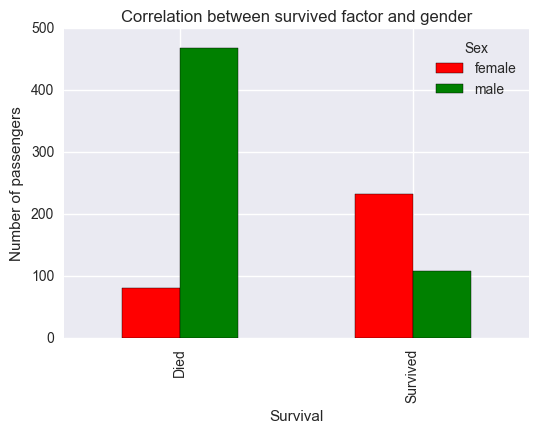

In [72]:
# using crosstab plot to combine two columns from the table
pd.crosstab(titanic_copy['Survival'], titanic_copy['Sex']).plot(kind='bar', color=['red','green'], title='Correlation between survived factor and gender').set(ylabel='Number of passengers')

We see that % of survived female higher then % of survived male. So it seems that women had more chance to save their lives then men.

### 4. Did a fare have any impact in the survival rates?

To answer on this question we make t-test on two independent samples from the same population.

We choose alpha-level = 0.05 and hypothesis:

*Null hypothesis*: average fare of survived = average fare of not survived

*Alternative hypothesis*: average fare of survived != average fare of not survived


In [73]:
# using ttest_ind function to make t-test
ttest_ind(titanic_copy[titanic_copy.Survival=='Survived'].Fare,titanic_copy[titanic_copy.Survival=='Died'].Fare,equal_var=False)

Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

Since our p-value is much greater than the alpha-level=0.05 , we will retain the Null hypothesis.
It means that there is no significant difference across average fare between those who survived and those who did not.

## Conclusion

After my analysis I can conclude that:

- most part of survived passengers was in the 20-30 yers range
- most of those who survived were from 1st class, most of those who died were from 3rd class
- female was most likely to survive in this crash
- fare hadn't got impact in the survival rates

If I will have more additional information, for example who was passenger and who was a crew member from survived number, then I can give more detailed explanation of factors that can cause chance to survive.

Also it is interesting to make analysis deeper and find correlation between sex and age, sex and class or age and class because there maybe a reason why those who survived has more chance to survive.

## Used resources

1. https://www.kaggle.com/c/titanic/data

2. http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

3. http://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe

4. http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object

5. http://matplotlib.org/api/pyplot_summary.html

6. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

7. http://stackoverflow.com/questions/22611446/perform-2-sample-t-test

8. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html